In [1]:
# Import the 20-news-groups dataset
from sklearn.datasets import fetch_20newsgroups
train_set = fetch_20newsgroups(subset='train', shuffle=True)

In [2]:
# Extracting features from text files using the Bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
# Using Naive Bayes
# For explaination of diferrent variants of NB visit this link
# http://blog.datumbox.com/machine-learning-tutorial-the-naive-bayes-text-classifier/
from sklearn.naive_bayes import MultinomialNB

In [5]:
# Create pipeline for text classification using Naive Bayes
from sklearn.pipeline import Pipeline
text_classification_NB = Pipeline([('vect', CountVectorizer()),
                                  ('tfidf',TfidfTransformer()),
                                  ('MulNB',MultinomialNB()),])

In [6]:
# Train
text_classification_NB.fit(X=train_set.data, y=train_set.target,)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ear_tf=False, use_idf=True)), ('MulNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [14]:
# Make predictions
test_set = fetch_20newsgroups(subset='test', shuffle=True)
predictions = text_classification_NB.predict(test_set.data)

In [12]:
# Measure F1 score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true=test_set.target,y_pred=predictions))

             precision    recall  f1-score   support

          0       0.80      0.52      0.63       319
          1       0.81      0.65      0.72       389
          2       0.82      0.65      0.73       394
          3       0.67      0.78      0.72       392
          4       0.86      0.77      0.81       385
          5       0.89      0.75      0.82       395
          6       0.93      0.69      0.80       390
          7       0.85      0.92      0.88       396
          8       0.94      0.93      0.93       398
          9       0.92      0.90      0.91       397
         10       0.89      0.97      0.93       399
         11       0.59      0.97      0.74       396
         12       0.84      0.60      0.70       393
         13       0.92      0.74      0.82       396
         14       0.84      0.89      0.87       394
         15       0.44      0.98      0.61       398
         16       0.64      0.94      0.76       364
         17       0.93      0.91      0.92   

In [13]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

/home/trung/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


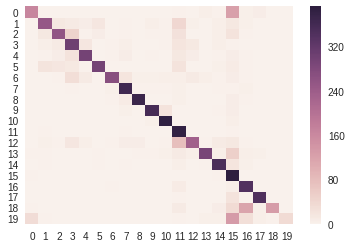

In [15]:
# Heatmap of confusion matrix
sns.heatmap(data=confusion_matrix(y_true=test_set.target,y_pred=predictions))

In [9]:
# Using SVM
# We use SGDCClassifier with parameters loss='hinge' as the real SVC will require massive amount of training time.
from sklearn.linear_model import SGDClassifier
text_classification_SVM = Pipeline([('count',CountVectorizer()),
                                    ('tfidf',TfidfTransformer()),
                                    ('SGDC', SGDClassifier(loss='hinge'))])
text_classification_SVM.fit(X=train_set.data, y=train_set.target)

Pipeline(steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

In [10]:
# Make predictions with SVM
SVM_predictions = text_classification_SVM.predict(X=test_set.data)

             precision    recall  f1-score   support

          0       0.82      0.78      0.80       319
          1       0.75      0.80      0.78       389
          2       0.76      0.74      0.75       394
          3       0.73      0.74      0.73       392
          4       0.83      0.87      0.85       385
          5       0.87      0.77      0.82       395
          6       0.83      0.91      0.87       390
          7       0.92      0.90      0.91       396
          8       0.95      0.95      0.95       398
          9       0.91      0.95      0.93       397
         10       0.95      0.98      0.96       399
         11       0.91      0.95      0.93       396
         12       0.84      0.76      0.80       393
         13       0.89      0.88      0.89       396
         14       0.89      0.95      0.92       394
         15       0.84      0.92      0.88       398
         16       0.73      0.94      0.82       364
         17       0.97      0.91      0.94   

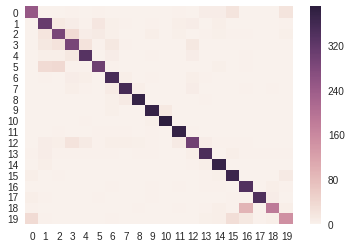

In [16]:
# Measure F1 score
print(classification_report(y_true=test_set.target,y_pred=SVM_predictions))
sns.heatmap(confusion_matrix(y_true=test_set.target,y_pred=SVM_predictions))